In [1]:
!pip install soccerdata

In [2]:
import soccerdata as sd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import time
import requests

[06/04/25 20:59:11] INFO     No custom team name replacements found. You can configure these in       ]8;id=214530;file:///usr/local/lib/python3.11/dist-packages/soccerdata/_config.py\_config.py]8;;\:]8;id=339185;file:///usr/local/lib/python3.11/dist-packages/soccerdata/_config.py#91\91]8;;\
                             /root/soccerdata/config/teamname_replacements.json.                                   

                    INFO     Custom league dict loaded from                                          ]8;id=276630;file:///usr/local/lib/python3.11/dist-packages/soccerdata/_config.py\_config.py]8;;\:]8;id=389354;file:///usr/local/lib/python3.11/dist-packages/soccerdata/_config.py#195\195]8;;\
                             /root/soccerdata/config/league_dict.json.                                             

In [3]:
sd.FBref.available_leagues()

['BRA-Serie A',
 'Big 5 European Leagues Combined',
 'ENG-Premier League',
 'ESP-La Liga',
 'FRA-Ligue 1',
 'GER-Bundesliga',
 'INT-European Championship',
 "INT-Women's World Cup",
 'INT-World Cup',
 'ITA-Serie A']

In [4]:
fbref = sd.FBref(leagues="BRA-Serie A", seasons=2025)
print(fbref.__doc__)

[06/04/25 20:59:14] INFO     Saving cached data to /root/soccerdata/data/FBref                       ]8;id=740986;file:///usr/local/lib/python3.11/dist-packages/soccerdata/_common.py\_common.py]8;;\:]8;id=852346;file:///usr/local/lib/python3.11/dist-packages/soccerdata/_common.py#263\263]8;;\

Provides pd.DataFrames from data at http://fbref.com.

    Data will be downloaded as necessary and cached locally in
    ``~/soccerdata/data/FBref``.

    Parameters
    ----------
    leagues : string or iterable, optional
        IDs of leagues to include. For efficiently reading data from the Top-5
        European leagues, use "Big 5 European Leagues Combined".
    seasons : string, int or list, optional
        Seasons to include. Supports multiple formats.
        Examples: '16-17'; 2016; '2016-17'; [14, 15, 16]
    proxy : 'tor' or dict or list(dict) or callable, optional
        Use a proxy to hide your IP address. Valid options are:
            - "tor": Uses the Tor network. Tor should be running in
              the background on port 9050.
            - dict: A dictionary with the proxy to use. The dict should be
              a mapping of supported protocols to proxy addresses. For example::

                  {
                      'http': 'http://10.10.1.10:3128',
     

In [5]:
player_season_std = fbref.read_player_season_stats(stat_type="standard")
player_season_std.head()

[06/04/25 20:59:21] WARNING  /usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py:165:       ]8;id=941747;file:///usr/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=891377;file:///usr/lib/python3.11/warnings.py#110\110]8;;\
                             FutureWarning: The behavior of DataFrame concatenation with empty or                  
                             all-NA entries is deprecated. In a future version, this will no longer                
                             exclude empty or all-NA columns when determining the result dtypes. To                
                             retain the old behavior, exclude the relevant entries before the                      
                             concat operation.                                                                     
                               pd.concat(dfs)                                                                      
                                                                                                                   

[06/04/25 20:59:29] WARNING  /usr/local/lib/python3.11/dist-packages/soccerdata/_common.py:145:     ]8;id=904896;file:///usr/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=680971;file:///usr/lib/python3.11/warnings.py#110\110]8;;\
                             UserWarning: Season id "2021" is ambiguous: interpreting as "20-21"                   
                               warnings.warn(msg, stacklevel=1)                                                    
                                                                                                                   

nation    pos     age  \
                                                                             
league      season team             player                                   
BRA-Serie A 2526   Atlético Mineiro Alan Franco         ECU     MF  26-287   
                                    Bernard             BRA  FW,MF  32-269   
                                    Brahian Palacios    COL     MF  22-192   
                                    Caio Paulista       BRA     DF  27-024   
                                    Fausto Vera         ARG     MF  25-070   

                                                      born Playing Time  \
                                                                     MP   
league      season team             player                                
BRA-Serie A 2526   Atlético Mineiro Alan Franco       1998            7   
                                    Bernard           1992            9   
                                    Brahian Palacios  2002            1   
                                    Caio Paulista     1998            4   
                                    Fausto Vera       2000            7   

                                                                       \
                                                     Starts  Min  90s   
league      season team             player                              
BRA-Serie A 2526   Atlético Mineiro Alan Franco           7  585  6.5   
                                    Bernard               1  216  2.4   
                                    Brahian Palacios      0    8  0.1   
                                    Caio Paulista         3  210  2.3   
                                    Fausto Vera           5  442  4.9   

                                                     Performance      ...  \
                                                             Gls Ast  ...   
league      season team             player                            ...   
BRA-Serie A 2526   Atlético Mineiro Alan Franco                0   0  ...   
                                    Bernard                    0   0  ...   
                                    Brahian Palacios           0   0  ...   
                                    Caio Paulista              0   0  ...   
                                    Fausto Vera                1   0  ...   

                                                     Per 90 Minutes            \
                                                                Gls  Ast  G+A   
league      season team             player                                      
BRA-Serie A 2526   Atlético Mineiro Alan Franco                 0.0  0.0  0.0   
                                    Bernard                     0.0  0.0  0.0   
                                    Brahian Palacios            0.0  0.0  0.0   
                                    Caio Paulista               0.0  0.0  0.0   
                                    Fausto Vera                 0.2  0.0  0.2   

                                                                              \
                                                     G-PK G+A-PK    xG   xAG   
league      season team             player                                     
BRA-Serie A 2526   Atlético Mineiro Alan Franco       0.0    0.0  0.01   0.0   
                                    Bernard           0.0    0.0  0.02  0.18   
                                    Brahian Palacios  0.0    0.0   0.0   0.0   
                                    Caio Paulista     0.0    0.0  0.15  0.04   
                                    Fausto Vera       0.2    0.2  0.09  0.03   

                                                                            
                                                     xG+xAG  npxG npxG+xAG  
league      season team             player                                  
BRA-Serie A 2526   Atlético Mineiro Alan Franco        0.01  0.01     0.01  
                           

In [6]:
player_season_std = player_season_std.reset_index()
print(player_season_std.columns)
player_season_std.head()

MultiIndex([(        'league',         ''),
            (        'season',         ''),
            (          'team',         ''),
            (        'player',         ''),
            (        'nation',         ''),
            (           'pos',         ''),
            (           'age',         ''),
            (          'born',         ''),
            (  'Playing Time',       'MP'),
            (  'Playing Time',   'Starts'),
            (  'Playing Time',      'Min'),
            (  'Playing Time',      '90s'),
            (   'Performance',      'Gls'),
            (   'Performance',      'Ast'),
            (   'Performance',      'G+A'),
            (   'Performance',     'G-PK'),
            (   'Performance',       'PK'),
            (   'Performance',    'PKatt'),
            (   'Performance',     'CrdY'),
            (   'Performance',     'CrdR'),
            (      'Expected',       'xG'),
            (      'Expected',     'npxG'),
            (      'Expected',  

league season              team            player nation    pos  \
                                                                          
0  BRA-Serie A   2526  Atlético Mineiro       Alan Franco    ECU     MF   
1  BRA-Serie A   2526  Atlético Mineiro           Bernard    BRA  FW,MF   
2  BRA-Serie A   2526  Atlético Mineiro  Brahian Palacios    COL     MF   
3  BRA-Serie A   2526  Atlético Mineiro     Caio Paulista    BRA     DF   
4  BRA-Serie A   2526  Atlético Mineiro       Fausto Vera    ARG     MF   

      age  born Playing Time         ... Per 90 Minutes                        \
                          MP Starts  ...            Gls  Ast  G+A G-PK G+A-PK   
0  26-287  1998            7      7  ...            0.0  0.0  0.0  0.0    0.0   
1  32-269  1992            9      1  ...            0.0  0.0  0.0  0.0    0.0   
2  22-192  2002            1      0  ...            0.0  0.0  0.0  0.0    0.0   
3  27-024  1998            4      3  ...            0.0  0.0  0.0  0.0    0.0   
4  25-070  2000            7      5  ...            0.2  0.0  0.2  0.2    0.2   

                                     
     xG   xAG xG+xAG  npxG npxG+xAG  
0  0.01   0.0   0.01  0.01     0.01  
1  0.02  0.18    0.2  0.02      0.2  
2   0.0   0.0    0.0   0.0      0.0  
3  0.15  0.04   0.19  0.15     0.19  
4  0.09  0.03   0.12  0.09     0.12  

[5 rows x 37 columns]

In [7]:
player_season_misc = fbref.read_player_season_stats(stat_type="misc")
player_season_misc.head()

[06/04/25 20:59:36] WARNING  /usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py:165:       ]8;id=360038;file:///usr/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=886492;file:///usr/lib/python3.11/warnings.py#110\110]8;;\
                             FutureWarning: The behavior of DataFrame concatenation with empty or                  
                             all-NA entries is deprecated. In a future version, this will no longer                
                             exclude empty or all-NA columns when determining the result dtypes. To                
                             retain the old behavior, exclude the relevant entries before the                      
                             concat operation.                                                                     
                               pd.concat(dfs)                                                                      
                                                                                                                   

                    WARNING  /usr/local/lib/python3.11/dist-packages/soccerdata/_common.py:145:     ]8;id=4822;file:///usr/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=67735;file:///usr/lib/python3.11/warnings.py#110\110]8;;\
                             UserWarning: Season id "2021" is ambiguous: interpreting as "20-21"                   
                               warnings.warn(msg, stacklevel=1)                                                    
                                                                                                                   

nation    pos     age  \
                                                                             
league      season team             player                                   
BRA-Serie A 2526   Atlético Mineiro Alan Franco         ECU     MF  26-287   
                                    Bernard             BRA  FW,MF  32-269   
                                    Brahian Palacios    COL     MF  22-192   
                                    Caio Paulista       BRA     DF  27-024   
                                    Fausto Vera         ARG     MF  25-070   

                                                      born  90s Performance  \
                                                                       CrdY   
league      season team             player                                    
BRA-Serie A 2526   Atlético Mineiro Alan Franco       1998  6.5           1   
                                    Bernard           1992  2.4           1   
                                    Brahian Palacios  2002  0.1           0   
                                    Caio Paulista     1998  2.3           1   
                                    Fausto Vera       2000  4.9           1   

                                                                         ...  \
                                                     CrdR 2CrdY Fls Fld  ...   
league      season team             player                               ...   
BRA-Serie A 2526   Atlético Mineiro Alan Franco         0     0   8   3  ...   
                                    Bernard             0     0   5   3  ...   
                                    Brahian Palacios    0     0   0   0  ...   
                                    Caio Paulista       0     0   4   2  ...   
                                    Fausto Vera         0     0   6   3  ...   

                                                                               \
                                                     Crs Int TklW PKwon PKcon   
league      season team             player                                      
BRA-Serie A 2526   Atlético Mineiro Alan Franco        2   2   10     0     0   
                                    Bernard            6   0    3     0     0   
                                    Brahian Palacios   0   0    0     0     0   
                                    Caio Paulista      6   3    4     0     0   
                                    Fausto Vera        2   4    6     0     0   

                                                              Aerial Duels  \
                                                     OG Recov          Won   
league      season team             player                                   
BRA-Serie A 2526   Atlético Mineiro Alan Franco       0    21            8   
                                    Bernard           0    13            1   
                                    Brahian Palacios  0     1            0   
                                    Caio Paulista     0    10            3   
                                    Fausto Vera       0    19            3   

                                                                  
                                                     Lost   Won%  
league      season team             player                        
BRA-Serie A 2526   Atlético Mineiro Alan Franco         1   88.9  
                                    Bernard             0  100.0  
                                    Brahian Palacios    0   <NA>  
                                    Caio Paulista       1   75.0  
                                    Fausto Vera         5   37.5  

[5 rows x 21 columns]

In [8]:
player_season_misc = player_season_misc.reset_index()
print(player_season_misc.columns)
player_season_misc.head()

MultiIndex([(      'league',      ''),
            (      'season',      ''),
            (        'team',      ''),
            (      'player',      ''),
            (      'nation',      ''),
            (         'pos',      ''),
            (         'age',      ''),
            (        'born',      ''),
            (         '90s',      ''),
            ( 'Performance',  'CrdY'),
            ( 'Performance',  'CrdR'),
            ( 'Performance', '2CrdY'),
            ( 'Performance',   'Fls'),
            ( 'Performance',   'Fld'),
            ( 'Performance',   'Off'),
            ( 'Performance',   'Crs'),
            ( 'Performance',   'Int'),
            ( 'Performance',  'TklW'),
            ( 'Performance', 'PKwon'),
            ( 'Performance', 'PKcon'),
            ( 'Performance',    'OG'),
            ( 'Performance', 'Recov'),
            ('Aerial Duels',   'Won'),
            ('Aerial Duels',  'Lost'),
            ('Aerial Duels',  'Won%')],
           )


league season              team            player nation    pos  \
                                                                          
0  BRA-Serie A   2526  Atlético Mineiro       Alan Franco    ECU     MF   
1  BRA-Serie A   2526  Atlético Mineiro           Bernard    BRA  FW,MF   
2  BRA-Serie A   2526  Atlético Mineiro  Brahian Palacios    COL     MF   
3  BRA-Serie A   2526  Atlético Mineiro     Caio Paulista    BRA     DF   
4  BRA-Serie A   2526  Atlético Mineiro       Fausto Vera    ARG     MF   

      age  born  90s Performance  ...                                    \
                            CrdY  ... Crs Int TklW PKwon PKcon OG Recov   
0  26-287  1998  6.5           1  ...   2   2   10     0     0  0    21   
1  32-269  1992  2.4           1  ...   6   0    3     0     0  0    13   
2  22-192  2002  0.1           0  ...   0   0    0     0     0  0     1   
3  27-024  1998  2.3           1  ...   6   3    4     0     0  0    10   
4  25-070  2000  4.9           1  ...   2   4    6     0     0  0    19   

  Aerial Duels              
           Won Lost   Won%  
0            8    1   88.9  
1            1    0  100.0  
2            0    0   <NA>  
3            3    1   75.0  
4            3    5   37.5  

[5 rows x 25 columns]

In [9]:
player_season_passing = fbref.read_player_season_stats(stat_type="passing")
player_season_passing.head()

[06/04/25 20:59:45] WARNING  /usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py:165:       ]8;id=920049;file:///usr/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=738574;file:///usr/lib/python3.11/warnings.py#110\110]8;;\
                             FutureWarning: The behavior of DataFrame concatenation with empty or                  
                             all-NA entries is deprecated. In a future version, this will no longer                
                             exclude empty or all-NA columns when determining the result dtypes. To                
                             retain the old behavior, exclude the relevant entries before the                      
                             concat operation.                                                                     
                               pd.concat(dfs)                                                                      
                                                                                                                   

                    WARNING  /usr/local/lib/python3.11/dist-packages/soccerdata/_common.py:145:     ]8;id=164619;file:///usr/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=750828;file:///usr/lib/python3.11/warnings.py#110\110]8;;\
                             UserWarning: Season id "2021" is ambiguous: interpreting as "20-21"                   
                               warnings.warn(msg, stacklevel=1)                                                    
                                                                                                                   

nation    pos     age  \
                                                                             
league      season team             player                                   
BRA-Serie A 2526   Atlético Mineiro Alan Franco         ECU     MF  26-287   
                                    Bernard             BRA  FW,MF  32-269   
                                    Brahian Palacios    COL     MF  22-192   
                                    Caio Paulista       BRA     DF  27-024   
                                    Fausto Vera         ARG     MF  25-070   

                                                      born  90s Total       \
                                                                  Cmp  Att   
league      season team             player                                   
BRA-Serie A 2526   Atlético Mineiro Alan Franco       1998  6.5   276  311   
                                    Bernard           1992  2.4   113  143   
                                    Brahian Palacios  2002  0.1     3    3   
                                    Caio Paulista     1998  2.3   116  144   
                                    Fausto Vera       2000  4.9   208  228   

                                                                             \
                                                       Cmp% TotDist PrgDist   
league      season team             player                                    
BRA-Serie A 2526   Atlético Mineiro Alan Franco        88.7    4260    1154   
                                    Bernard            79.0    1824     482   
                                    Brahian Palacios  100.0      51       8   
                                    Caio Paulista      80.6    1799     559   
                                    Fausto Vera        91.2    3505     801   

                                                      ...  Long Ast  xAG  \
                                                      ...  Cmp%            
league      season team             player            ...                  
BRA-Serie A 2526   Atlético Mineiro Alan Franco       ...  80.0   0  0.0   
                                    Bernard           ...  72.7   0  0.4   
                                    Brahian Palacios  ...  <NA>   0  0.0   
                                    Caio Paulista     ...  58.3   0  0.1   
                                    Fausto Vera       ...  90.0   0  0.1   

                                                     Expected       KP 1/3  \
                                                           xA A-xAG          
league      season team             player                                   
BRA-Serie A 2526   Atlético Mineiro Alan Franco           0.1   0.0  2  26   
                                    Bernard               0.3  -0.4  7   7   
                                    Brahian Palacios      0.0   0.0  0   0   
                                    Caio Paulista         0.2  -0.1  4   9   
                                    Fausto Vera           0.2  -0.1  3  17   

                                                     PPA CrsPA PrgP  
                                                                     
league      season team             player                           
BRA-Serie A 2526   Atlético Mineiro Alan Franco        1     0   22  
                                    Bernard            8     2   23  
                                    Brahian Palacios   0     0    0  
                                    Caio Paulista      2     1   17  
                                    Fausto Vera        3     0   22  

[5 rows x 28 columns]

In [10]:
player_season_passing = player_season_passing.reset_index()
print(player_season_passing.columns)
player_season_passing.head()

MultiIndex([(  'league',        ''),
            (  'season',        ''),
            (    'team',        ''),
            (  'player',        ''),
            (  'nation',        ''),
            (     'pos',        ''),
            (     'age',        ''),
            (    'born',        ''),
            (     '90s',        ''),
            (   'Total',     'Cmp'),
            (   'Total',     'Att'),
            (   'Total',    'Cmp%'),
            (   'Total', 'TotDist'),
            (   'Total', 'PrgDist'),
            (   'Short',     'Cmp'),
            (   'Short',     'Att'),
            (   'Short',    'Cmp%'),
            (  'Medium',     'Cmp'),
            (  'Medium',     'Att'),
            (  'Medium',    'Cmp%'),
            (    'Long',     'Cmp'),
            (    'Long',     'Att'),
            (    'Long',    'Cmp%'),
            (     'Ast',        ''),
            (     'xAG',        ''),
            ('Expected',      'xA'),
            ('Expected',   'A-xAG'),
 

league season              team            player nation    pos  \
                                                                          
0  BRA-Serie A   2526  Atlético Mineiro       Alan Franco    ECU     MF   
1  BRA-Serie A   2526  Atlético Mineiro           Bernard    BRA  FW,MF   
2  BRA-Serie A   2526  Atlético Mineiro  Brahian Palacios    COL     MF   
3  BRA-Serie A   2526  Atlético Mineiro     Caio Paulista    BRA     DF   
4  BRA-Serie A   2526  Atlético Mineiro       Fausto Vera    ARG     MF   

      age  born  90s Total  ...  Long Ast  xAG Expected       KP 1/3 PPA  \
                       Cmp  ...  Cmp%                xA A-xAG              
0  26-287  1998  6.5   276  ...  80.0   0  0.0      0.1   0.0  2  26   1   
1  32-269  1992  2.4   113  ...  72.7   0  0.4      0.3  -0.4  7   7   8   
2  22-192  2002  0.1     3  ...  <NA>   0  0.0      0.0   0.0  0   0   0   
3  27-024  1998  2.3   116  ...  58.3   0  0.1      0.2  -0.1  4   9   2   
4  25-070  2000  4.9   208  ...  90.0   0  0.1      0.2  -0.1  3  17   3   

  CrsPA PrgP  
              
0     0   22  
1     2   23  
2     0    0  
3     1   17  
4     0   22  

[5 rows x 32 columns]

In [11]:
player_season_possession = fbref.read_player_season_stats(stat_type="possession")
player_season_possession.head()

[06/04/25 20:59:51] WARNING  /usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py:165:       ]8;id=366358;file:///usr/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=826111;file:///usr/lib/python3.11/warnings.py#110\110]8;;\
                             FutureWarning: The behavior of DataFrame concatenation with empty or                  
                             all-NA entries is deprecated. In a future version, this will no longer                
                             exclude empty or all-NA columns when determining the result dtypes. To                
                             retain the old behavior, exclude the relevant entries before the                      
                             concat operation.                                                                     
                               pd.concat(dfs)                                                                      
                                                                                                                   

                    WARNING  /usr/local/lib/python3.11/dist-packages/soccerdata/_common.py:145:     ]8;id=911971;file:///usr/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=964087;file:///usr/lib/python3.11/warnings.py#110\110]8;;\
                             UserWarning: Season id "2021" is ambiguous: interpreting as "20-21"                   
                               warnings.warn(msg, stacklevel=1)                                                    
                                                                                                                   

nation    pos     age  \
                                                                             
league      season team             player                                   
BRA-Serie A 2526   Atlético Mineiro Alan Franco         ECU     MF  26-287   
                                    Bernard             BRA  FW,MF  32-269   
                                    Brahian Palacios    COL     MF  22-192   
                                    Caio Paulista       BRA     DF  27-024   
                                    Fausto Vera         ARG     MF  25-070   

                                                      born  90s Touches  \
                                                                Touches   
league      season team             player                                
BRA-Serie A 2526   Atlético Mineiro Alan Franco       1998  6.5     344   
                                    Bernard           1992  2.4     167   
                                    Brahian Palacios  2002  0.1       4   
                                    Caio Paulista     1998  2.3     190   
                                    Fausto Vera       2000  4.9     264   

                                                                              \
                                                     Def Pen Def 3rd Mid 3rd   
league      season team             player                                     
BRA-Serie A 2526   Atlético Mineiro Alan Franco            9      75     239   
                                    Bernard                0      11      72   
                                    Brahian Palacios       0       0       2   
                                    Caio Paulista         10      44      85   
                                    Fausto Vera           12      49     176   

                                                              ... Carries  \
                                                     Att 3rd  ... Carries   
league      season team             player                    ...           
BRA-Serie A 2526   Atlético Mineiro Alan Franco           35  ...     185   
                                    Bernard               85  ...     107   
                                    Brahian Palacios       2  ...       2   
                                    Caio Paulista         63  ...      90   
                                    Fausto Vera           40  ...     160   

                                                                               \
                                                     TotDist PrgDist PrgC 1/3   
league      season team             player                                      
BRA-Serie A 2526   Atlético Mineiro Alan Franco          939     361    2   3   
                                    Bernard              579     294   11  13   
                                    Brahian Palacios      11       0    0   0   
                                    Caio Paulista        423     195    6   5   
                                    Fausto Vera          665     271    5   0   

                                                                 Receiving  \
                                                     CPA Mis Dis       Rec   
league      season team             player                                   
BRA-Serie A 2526   Atlético Mineiro Alan Franco        0   1   1       231   
                                    Bernard            1   5   3       126   
                                    Brahian Palacios   0   0   0         2   
                                    Caio Paulista      2   6   2       118   
                                    Fausto Vera        0   1   6       188   

                                                           
                                                     PrgR  
league      season team             player                 
BRA-Serie A 2526   Atlético Mineiro Alan Franco         2  
                                    Bernard            

In [12]:
player_season_possession = player_season_possession.reset_index()
print(player_season_possession.columns)
player_season_possession.head()

MultiIndex([(   'league',        ''),
            (   'season',        ''),
            (     'team',        ''),
            (   'player',        ''),
            (   'nation',        ''),
            (      'pos',        ''),
            (      'age',        ''),
            (     'born',        ''),
            (      '90s',        ''),
            (  'Touches', 'Touches'),
            (  'Touches', 'Def Pen'),
            (  'Touches', 'Def 3rd'),
            (  'Touches', 'Mid 3rd'),
            (  'Touches', 'Att 3rd'),
            (  'Touches', 'Att Pen'),
            (  'Touches',    'Live'),
            ( 'Take-Ons',     'Att'),
            ( 'Take-Ons',    'Succ'),
            ( 'Take-Ons',   'Succ%'),
            ( 'Take-Ons',    'Tkld'),
            ( 'Take-Ons',   'Tkld%'),
            (  'Carries', 'Carries'),
            (  'Carries', 'TotDist'),
            (  'Carries', 'PrgDist'),
            (  'Carries',    'PrgC'),
            (  'Carries',     '1/3'),
            

league season              team            player nation    pos  \
                                                                          
0  BRA-Serie A   2526  Atlético Mineiro       Alan Franco    ECU     MF   
1  BRA-Serie A   2526  Atlético Mineiro           Bernard    BRA  FW,MF   
2  BRA-Serie A   2526  Atlético Mineiro  Brahian Palacios    COL     MF   
3  BRA-Serie A   2526  Atlético Mineiro     Caio Paulista    BRA     DF   
4  BRA-Serie A   2526  Atlético Mineiro       Fausto Vera    ARG     MF   

      age  born  90s Touches  ... Carries                                   \
                     Touches  ... Carries TotDist PrgDist PrgC 1/3 CPA Mis   
0  26-287  1998  6.5     344  ...     185     939     361    2   3   0   1   
1  32-269  1992  2.4     167  ...     107     579     294   11  13   1   5   
2  22-192  2002  0.1       4  ...       2      11       0    0   0   0   0   
3  27-024  1998  2.3     190  ...      90     423     195    6   5   2   6   
4  25-070  2000  4.9     264  ...     160     665     271    5   0   0   1   

      Receiving       
  Dis       Rec PrgR  
0   1       231    2  
1   3       126   21  
2   0         2    1  
3   2       118   15  
4   6       188    6  

[5 rows x 31 columns]

In [13]:
# 1. Achatar o MultiIndex para facilitar a manipulação
player_season_std.columns = ['_'.join(filter(None, col)).strip() for col in player_season_std.columns]
player_season_misc.columns = ['_'.join(filter(None, col)).strip() for col in player_season_misc.columns]
player_season_possession.columns = ['_'.join(filter(None, col)).strip() for col in player_season_possession.columns]
player_season_passing.columns = ['_'.join(filter(None, col)).strip() for col in player_season_passing.columns]

# 2. Verificar os novos nomes das colunas
print(player_season_std.columns)
print(player_season_misc.columns)
print(player_season_possession.columns)
print(player_season_passing.columns)

Index(['league', 'season', 'team', 'player', 'nation', 'pos', 'age', 'born',
       'Playing Time_MP', 'Playing Time_Starts', 'Playing Time_Min',
       'Playing Time_90s', 'Performance_Gls', 'Performance_Ast',
       'Performance_G+A', 'Performance_G-PK', 'Performance_PK',
       'Performance_PKatt', 'Performance_CrdY', 'Performance_CrdR',
       'Expected_xG', 'Expected_npxG', 'Expected_xAG', 'Expected_npxG+xAG',
       'Progression_PrgC', 'Progression_PrgP', 'Progression_PrgR',
       'Per 90 Minutes_Gls', 'Per 90 Minutes_Ast', 'Per 90 Minutes_G+A',
       'Per 90 Minutes_G-PK', 'Per 90 Minutes_G+A-PK', 'Per 90 Minutes_xG',
       'Per 90 Minutes_xAG', 'Per 90 Minutes_xG+xAG', 'Per 90 Minutes_npxG',
       'Per 90 Minutes_npxG+xAG'],
      dtype='object')
Index(['league', 'season', 'team', 'player', 'nation', 'pos', 'age', 'born',
       '90s', 'Performance_CrdY', 'Performance_CrdR', 'Performance_2CrdY',
       'Performance_Fls', 'Performance_Fld', 'Performance_Off',
       'Perform

In [14]:
# 3. Selecionar as colunas desejadas de cada DataFrame
df_std_selected = player_season_std[
    ['player', 'team','age','pos','Playing Time_Min', 'Progression_PrgR', 'Expected_xG', 'Expected_xAG', 'Performance_G-PK', 'Performance_Ast', 'Progression_PrgC', 'Progression_PrgP']
]
df_misc_selected = player_season_misc[
    ['player', 'team', 'Performance_Crs']
]
df_passing_selected = player_season_passing[
    ['player', 'team','1/3','KP']
]
df_possession_selected = player_season_possession[
    ['player', 'team', 'Take-Ons_Att','Take-Ons_Succ',]
]
# 4. Realizar o merge dos DataFrames com base nas colunas 'player' e 'team'
df_merged = pd.merge(df_std_selected, df_misc_selected, on=['player', 'team'], how='inner')
df_merged = pd.merge(df_merged, df_possession_selected, on=['player', 'team'], how='inner')
df_merged = pd.merge(df_merged, df_passing_selected, on=['player', 'team'], how='inner')

# 5. Exibir o resultado
print(df_merged.head())

             player              team     age    pos  Playing Time_Min  \
0       Alan Franco  Atlético Mineiro  26-287     MF               585   
1           Bernard  Atlético Mineiro  32-269  FW,MF               216   
2  Brahian Palacios  Atlético Mineiro  22-192     MF                 8   
3     Caio Paulista  Atlético Mineiro  27-024     DF               210   
4       Fausto Vera  Atlético Mineiro  25-070     MF               442   

   Progression_PrgR  Expected_xG  Expected_xAG  Performance_G-PK  \
0                 2          0.1           0.0                 0   
1                21          0.0           0.4                 0   
2                 1          0.0           0.0                 0   
3                15          0.3           0.1                 0   
4                 6          0.4           0.1                 1   

   Performance_Ast  Progression_PrgC  Progression_PrgP  Performance_Crs  \
0                0                 2                22                2

In [15]:
# Filtrar jogadores com pelo menos 600 minutos jogados
filtered_data = df_merged[df_merged[('Playing Time_Min')] >= 600]

# Filtrar para remover goleiros (GK) e zagueiros (DF)
filtered_data = filtered_data[
    ~filtered_data[('pos')].str.contains('GK|DF', na=False)
]

# Exibir as primeiras linhas para confirmar a filtragem
print(filtered_data.head())

            player              team     age    pos  Playing Time_Min  \
7   Gustavo Scarpa  Atlético Mineiro  31-150  MF,FW               871   
8             Hulk  Atlético Mineiro  38-314  FW,MF               825   
19            Rony  Atlético Mineiro  30-024  FW,MF               927   
22    Tomás Cuello  Atlético Mineiro  25-091  FW,MF               675   
26  Caio Alexandre             Bahia  26-100     MF               658   

    Progression_PrgR  Expected_xG  Expected_xAG  Performance_G-PK  \
7                 38          0.7           2.4                 0   
8                 78          1.8           2.0                 0   
19                67          3.6           0.2                 3   
22                85          1.7           0.6                 1   
26                 9          0.1           1.0                 0   

    Performance_Ast  Progression_PrgC  Progression_PrgP  Performance_Crs  \
7                 1                18                70               

In [16]:
# Selecionar as colunas desejadas para análise
meia_ofensivo = filtered_data[[
    ('player'),
    ('team'),
    ('pos'),
    ('Playing Time_Min'),
    ('Expected_xG'),
    ('Expected_xAG'),
    ('Performance_G-PK'),
    ('Performance_Ast'),
    ('Progression_PrgC'),
    ('Progression_PrgP'),
    ('KP'),
    ('1/3'),
    ('Performance_Crs'),
    ('Take-Ons_Att'),
    ('Take-Ons_Succ')
]]

# Renomear as colunas para facilitar o uso
meia_ofensivo.columns = ['jogador','time','posicao', 'Minutos','xG', 'xAG', 'G-PK', 'Assistencias', 'PrgC', 'PrgP','Key_Pass','Passing 1/3','Cross','Dribles_Tentados','Dribles_certos']

# Exibir as primeiras linhas para confirmar a seleção de colunas
print(meia_ofensivo.head())


# Criar a nova coluna 'Dribles' no formato "50% (5/10)"
meia_ofensivo['%Dribles'] = (
    (meia_ofensivo['Dribles_certos'] / meia_ofensivo['Dribles_Tentados'] * 100).round(1).astype(str) + '% (' +
    meia_ofensivo['Dribles_certos'].astype(str) + '/' +
    meia_ofensivo['Dribles_Tentados'].astype(str) + ')'
)

# Criar uma nova coluna 'Acoes_Ofensivas' somando 'PrgC' e 'PrgP'
meia_ofensivo['Acoes Ofensivas'] = meia_ofensivo['PrgC'] + meia_ofensivo['PrgP']

# Remover jogadores com todas as métricas iguais a 0
meia_ofensivo = meia_ofensivo[(meia_ofensivo[['xG', 'xAG', 'G-PK', 'Assistencias', 'PrgC', 'PrgP']] != 0).any(axis=1)]
# Exportar o dataframe para um arquivo CSV
meia_ofensivo.to_csv('meia_ofensivo_data.csv', index=False, encoding='utf-8-sig')
# Exibir as primeiras linhas para conferir
print(meia_ofensivo)

           jogador              time posicao  Minutos   xG  xAG  G-PK  \
7   Gustavo Scarpa  Atlético Mineiro   MF,FW      871  0.7  2.4     0   
8             Hulk  Atlético Mineiro   FW,MF      825  1.8  2.0     0   
19            Rony  Atlético Mineiro   FW,MF      927  3.6  0.2     3   
22    Tomás Cuello  Atlético Mineiro   FW,MF      675  1.7  0.6     1   
26  Caio Alexandre             Bahia      MF      658  0.1  1.0     0   

    Assistencias  PrgC  PrgP  Key_Pass  Passing 1/3  Cross  Dribles_Tentados  \
7              1    18    70        33           53     83                 6   
8              2    18    17        21            9     31                27   
19             0    14    18         6            9     19                12   
22             0    39    37        16           19     15                49   
26             1     5    47         6           51      7                 9   

    Dribles_certos  
7                0  
8               13  
19               

[06/04/25 20:59:58] WARNING  <ipython-input-16-ce706d5f5d22>:28: SettingWithCopyWarning:            ]8;id=662221;file:///usr/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=196312;file:///usr/lib/python3.11/warnings.py#110\110]8;;\
                             A value is trying to be set on a copy of a slice from a DataFrame.                    
                             Try using .loc = value instead                                                        
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               meia_ofensivo['%Dribles'] = (                                                       
                                                                                                                   

            jogador              time posicao  Minutos   xG  xAG  G-PK  \
7    Gustavo Scarpa  Atlético Mineiro   MF,FW      871  0.7  2.4     0   
8              Hulk  Atlético Mineiro   FW,MF      825  1.8  2.0     0   
19             Rony  Atlético Mineiro   FW,MF      927  3.6  0.2     3   
22     Tomás Cuello  Atlético Mineiro   FW,MF      675  1.7  0.6     1   
26   Caio Alexandre             Bahia      MF      658  0.1  1.0     0   
..              ...               ...     ...      ...  ...  ...   ...   
507   Pablo Vegetti     Vasco da Gama      FW      828  4.8  0.5     7   
511     Rayan Vitor     Vasco da Gama      FW      708  1.3  0.8     1   
524       Janderson           Vitória   FW,MF      734  0.7  0.3     1   
530     Matheusinho           Vitória      MF      648  1.5  0.3     2   
536          Ronald           Vitória      MF      650  0.1  0.5     0   

     Assistencias  PrgC  PrgP  Key_Pass  Passing 1/3  Cross  Dribles_Tentados  \
7               1    18    70 

2. Criar modelos de classificação para (Meias Ofensivos)

In [17]:
# Padronizar os dados para clusterização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(meia_ofensivo[['xG','xAG','G-PK','Assistencias','PrgC','PrgP','Key_Pass','Passing 1/3','Cross','Dribles_Tentados','Dribles_certos']])

# Definir e ajustar o modelo K-Means
kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Adicionar os clusters ao DataFrame
meia_ofensivo['Cluster'] = clusters

# Exibir os jogadores com seus clusters
print(meia_ofensivo[['xG','xAG','G-PK','Assistencias','Key_Pass','Dribles_certos','Passing 1/3','Cluster']])

      xG  xAG  G-PK  Assistencias  Key_Pass  Dribles_certos  Passing 1/3  \
7    0.7  2.4     0             1        33               0           53   
8    1.8  2.0     0             2        21              13            9   
19   3.6  0.2     3             0         6               3            9   
22   1.7  0.6     1             0        16              27           19   
26   0.1  1.0     0             1         6               5           51   
..   ...  ...   ...           ...       ...             ...          ...   
507  4.8  0.5     7             1         4               0            2   
511  1.3  0.8     1             1         5               6           12   
524  0.7  0.3     1             0         6              11            5   
530  1.5  0.3     2             0         7               6           25   
536  0.1  0.5     0             0        11              10           39   

     Cluster  
7          4  
8          0  
19         5  
22         0  
26         2

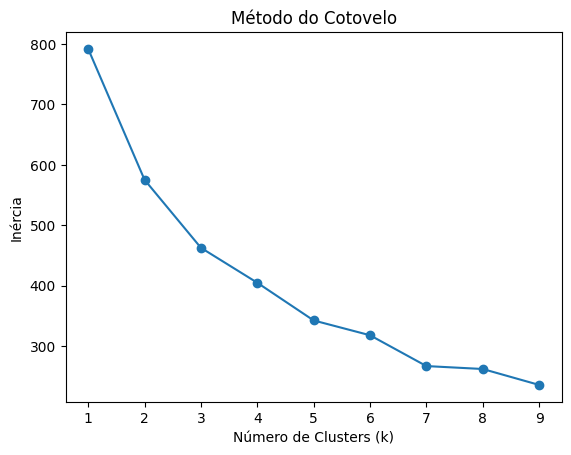

In [18]:
#Avaliar o Número de Clusters
inertia = []
k_range = range(1, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo')
plt.show()

In [19]:
# Estatísticas médias por cluster
cluster_stats = meia_ofensivo.groupby('Cluster')[['xG','xAG','G-PK','Assistencias','PrgC','PrgP','Key_Pass','Passing 1/3','Cross','Dribles_Tentados','Dribles_certos',]].mean()
cluster_stats['Jogadores'] = meia_ofensivo['Cluster'].value_counts()
print(cluster_stats)

               xG       xAG      G-PK  Assistencias       PrgC       PrgP  \
Cluster                                                                     
0        1.316667     1.425  0.583333      1.333333       32.0  29.416667   
1        0.663636  0.422727  0.454545           0.5   9.909091  22.954545   
2        0.364706  0.588235  0.294118      0.705882   7.882353  47.882353   
3           1.725     1.175     2.875         2.125      15.75     31.625   
4        0.966667  2.566667  0.333333      2.333333  13.666667  60.666667   
5            3.74      1.06       3.6           0.9        8.5       14.2   

          Key_Pass  Passing 1/3      Cross  Dribles_Tentados  Dribles_certos  \
Cluster                                                                        
0        16.916667    17.583333      33.75         43.083333       19.416667   
1         5.181818    19.727273        8.0         12.863636        5.272727   
2         8.529412    45.823529   5.764706          9.176471   

In [20]:
# Selecionar apenas as colunas numéricas para calcular a correlação
numeric_columns = filtered_data.select_dtypes(include=np.number).columns
correlation_matrix = filtered_data[numeric_columns].corr()

# Exibir a matriz de correlação
print(correlation_matrix)

                  Playing Time_Min  Progression_PrgR  Expected_xG  \
Playing Time_Min          1.000000          0.168808     0.179003   
Progression_PrgR          0.168808          1.000000     0.471874   
Expected_xG               0.179003          0.471874     1.000000   
Expected_xAG              0.198433          0.412828     0.280720   
Performance_G-PK          0.097722          0.301143     0.817791   
Performance_Ast           0.134746          0.388188     0.274704   
Progression_PrgC          0.193199          0.800023     0.148634   
Progression_PrgP          0.306252         -0.157848    -0.427934   
Performance_Crs           0.228168          0.532914     0.037166   
Take-Ons_Att              0.193940          0.719881     0.097186   
Take-Ons_Succ             0.143421          0.609824     0.054391   
1/3                       0.182811         -0.413054    -0.513444   
KP                        0.361838          0.422776     0.127690   

                  Expected_xAG  P

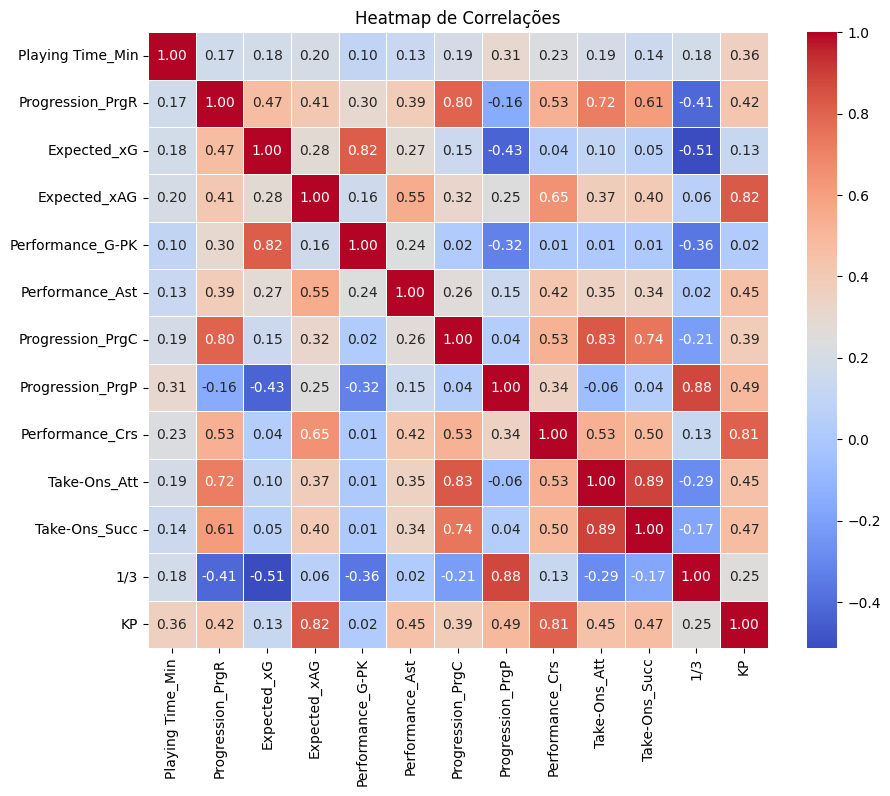

In [21]:
plt.figure(figsize=(10, 8))  # Define o tamanho da figura
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap de Correlações')
plt.show()

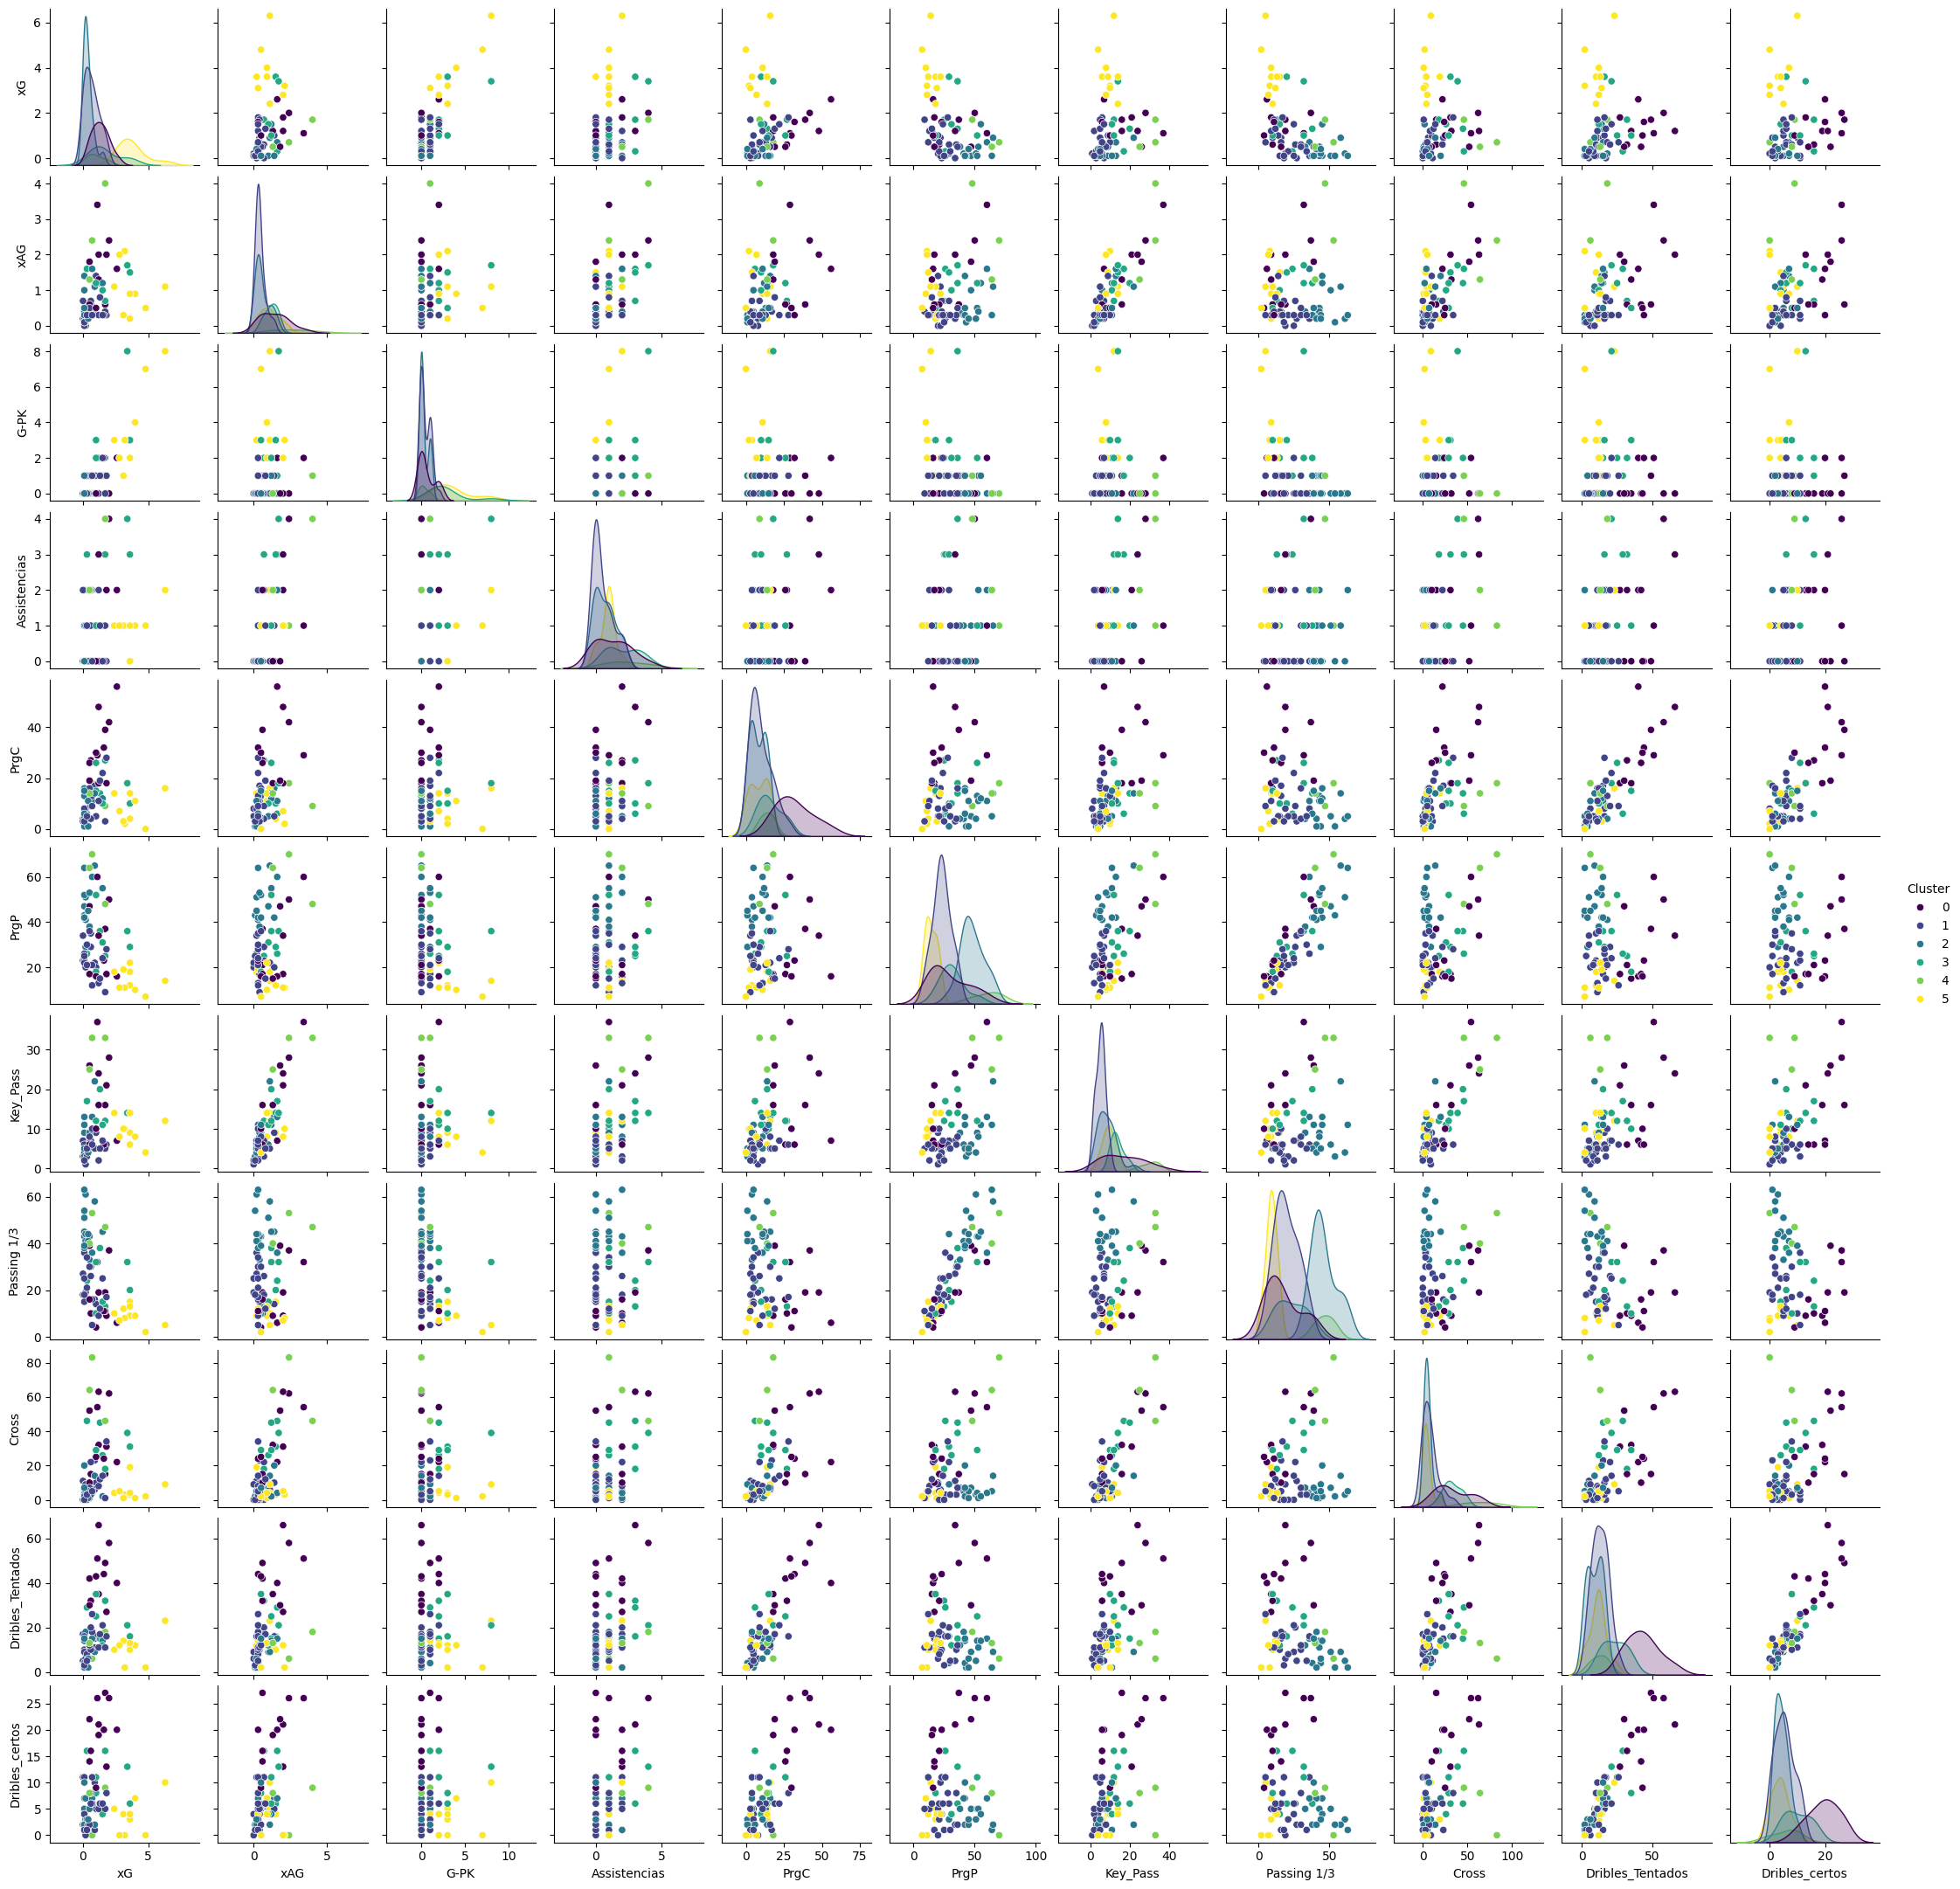

In [22]:
# Adicionar as métricas e o cluster ao DataFrame para visualização
metrics = ['xG','xAG','G-PK','Assistencias','PrgC','PrgP','Key_Pass','Passing 1/3','Cross','Dribles_Tentados','Dribles_certos','Cluster']

# Plotar o pair plot para todas as métricas
sns.pairplot(meia_ofensivo[metrics], hue='Cluster', palette='viridis', diag_kind='kde', height=2)
plt.show()

### **Comportamento de Variáveis e Distribuição de Clusters para Meias Ofensivos**

---

### **1. Análise de Correlações**

#### **Correlação Positiva Alta**

1. **Performance_G-PK & Expected_xG: 0.82**
→ Gols (sem pênaltis) fortemente associados à expectativa de gols — jogadores com maior xG tendem a marcar mais.

2. **Expected_xAG & Performance_Ast: 0.82**
→ Alta coerência entre assistências esperadas e assistências reais.

3. **Progression_Prgr & Progression_PrgrC: 0.80**
→ Fortíssima correlação entre ações progressivas recebidas e conduzidas.

4. **Take-Ons_Att & Take-Ons_Succ: 0.89**
→ Mais tentativas de dribles geralmente significam mais dribles bem-sucedidos.

5. **Performance_Crs & KP (Key Passes): 0.81**
→ Jogadores que cruzam mais tendem a gerar mais passes-chave.

6. **Progression_PrgrC & Progression_PrgrP: 0.83**
→ Ações progressivas conduzidas e passes progressivos também caminham juntas.

#### **Correlações Moderadas (r entre 0.50 e 0.69):**

1. **Performance_G-PK & Performance_Crs: 0.65**
→ Indica que jogadores que finalizam bem também têm bom volume de cruzamentos (possível perfil híbrido de meia-atacante).

2. **Expected_xAG & Performance_Crs: 0.65**
→ Cruzamentos contribuem bastante para assistências esperadas.

3. **Take-Ons_Att & Performance_Prgr: 0.83**
→ Dribles e conduções estão conectadas ao jogo progressivo ofensivo.

#### **Correlações Negativas Relevantes:**
1. **Expected_xG & 1/3: -0.51**
→ Entradas no terço final não estão necessariamente associadas a alta expectativa de gols — pode indicar função de preparação.

2. **Expected_xG & Progression_PrgrP: -0.43**
→ Jogadores com muitos passes progressivos tendem a finalizar menos (função mais armadora do que finalizadora).


---

### **2. Perfis dos Clusters**

#### **Cluster 0 (Roxo)**
Grupo mais numeroso.

Apresenta jogadores com valores medianos na maioria das métricas.

Possível perfil de meias equilibrados, com participação em passes progressivos e volume moderado de ações ofensivas.

#### **Cluster 1 (Amarelo)**
Destaca-se em xG, G-PK, KP e Performance_Crs.

Jogadores com maior poder ofensivo, participam diretamente em gols e assistências.

Provavelmente meias-atacantes centrais ou extremos criativos finalizadores.

#### **Cluster 2 (Verde)**
Alta contribuição em xAG, Assistências e KP.

Perfil de armadores puros, que geram muitas chances.

#### **Cluster 3 (Azul claro)**
Alta performance em Take-Ons (tentativas e sucessos).

Jogadores que desafiam defensores constantemente — dribladores/agudos.

#### **Cluster 4 (Ciano mais escuro)**
Baixos valores em quase todas as métricas.

Provavelmente jogadores com pouca participação ofensiva ou que jogaram poucos minutos.

#### **Cluster 5 (Azul escuro)**
Apresenta altos valores em Progression_PrgrC e PrgrP.

Perfil de jogadores que carregam ou passam a bola com grande frequência, com papel de ligação/meia central moderno.

---

### **3. Destaques em Comportamento**

1. **Progressão por Passe vs Assistências (0.67):**
   Meias que avançam o jogo com passes progressivos frequentemente registram mais assistências, reforçando sua importância na construção ofensiva.

2. **Cruzamentos vs Assistências (0.73):**
   A relação entre cruzamentos e assistências mostra que jogadores focados em bolas alçadas contribuem significativamente para o ataque.

3. **Dribles Tentados vs Dribles Certos (0.85):**
   Alta confiança e habilidade técnica em situações individuais são características dos especialistas em dribles.

4. **Key Passes vs Passing 1/3 (0.81):**
   Passes-chave no último terço reforçam a importância da precisão e visão de jogo na criação de chances.

---

In [34]:
cluster_names = {
    0: 'mei equilibrados',
    1: 'mei versateis',
    2: 'mei armadores',
    3: 'mei dribladores',
    4: 'mei baixo',
    5: 'mei atacante',
}

# Adicionar nomes ao DataFrame
meia_ofensivo['Perfil'] = meia_ofensivo['Cluster'].map(cluster_names)

# Exibir os primeiros jogadores com seus perfis
print(meia_ofensivo[['xG','xAG','G-PK','Assistencias','PrgC','PrgP','Key_Pass','Passing 1/3','Cross','Dribles_Tentados','Dribles_certos','Perfil']].head())

     xG  xAG  G-PK  Assistencias  PrgC  PrgP  Key_Pass  Passing 1/3  Cross  Dribles_Tentados  Dribles_certos            Perfil
7   0.7  2.4     0             1    18    70        33           53     83                 6               0         mei baixo
8   1.8  2.0     0             2    18    17        21            9     31                27              13  mei equilibrados
19  3.6  0.2     3             0    14    18         6            9     19                12               3      mei atacante
22  1.7  0.6     1             0    39    37        16           19     15                49              27  mei equilibrados
26  0.1  1.0     0             1     5    47         6           51      7                 9               5     mei armadores


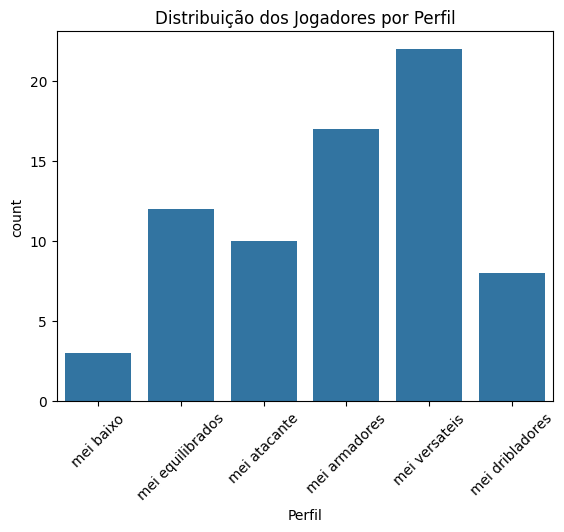

In [35]:
sns.countplot(data=meia_ofensivo, x='Perfil')
plt.xticks(rotation=45)
plt.title('Distribuição dos Jogadores por Perfil')
plt.show()

In [38]:
# Função para exibir jogadores de um perfil específico
def exibir_jogadores_por_perfil(perfil_escolhido):
    # Filtrar os jogadores pelo perfil escolhido
    jogadores_filtrados = meia_ofensivo[meia_ofensivo['Perfil'] == perfil_escolhido]

    if jogadores_filtrados.empty:
        print(f"Nenhum jogador encontrado para o perfil: {perfil_escolhido}")
    else:
        print(f"\nJogadores no perfil: {perfil_escolhido}")
        print(jogadores_filtrados[['jogador','time','posicao', 'Minutos','xG','xAG','G-PK','Assistencias','PrgC','PrgP','Key_Pass','Passing 1/3','Cross','Dribles_Tentados','Dribles_certos',]])

# Exemplo: Exibir jogadores do perfil "Apoiadores Ofensivos"
# Definir a largura máxima e o número de colunas exibidas
pd.set_option('display.max_columns', None)  # Exibir todas as colunas
pd.set_option('display.width', 1000)        # Aumentar a largura da tabela
perfil_escolhido = "mei armadores"  # Altere conforme necessário
exibir_jogadores_por_perfil(perfil_escolhido)


Jogadores no perfil: mei armadores
            jogador           time posicao  Minutos   xG  xAG  G-PK  Assistencias  PrgC  PrgP  Key_Pass  Passing 1/3  Cross  Dribles_Tentados  Dribles_certos
26   Caio Alexandre          Bahia      MF      658  0.1  1.0     0             1     5    47         6           51      7                 9               5
62          Gregore  Botafogo (RJ)      MF      775  0.2  0.2     0             0     4    51         4           61      3                 5               3
69   Marlon Freitas  Botafogo (RJ)      MF      853  0.1  0.3     0             2     5    64        11           63      5                 2               1
105  André Carrillo    Corinthians      MF      617  0.1  1.4     0             0    16    42        13           45     20                14               7
107           Breno    Corinthians      MF      747  0.1  0.5     0             1    13    52         9           43      4                14               5
147    Lucas Rom

In [39]:
# Dicionário dos peso para cada métrica
pesos = {
    'xG': 1.1,
    'xAG': 1.85,
    'G-PK': 1.80,
    'Assistencias': 2,
    'Acoes Ofensivas': 1.2,
    'Key_Pass': 1.5,
    'Passing 1/3': 1.1,
    'Cross': 1.0,
    '%Dribles': 1.25
}

# Função para normalizar uma métrica com base no valor máximo
def normalizar(coluna):
    # Verifica se a coluna é numérica antes de normalizar
    if pd.api.types.is_numeric_dtype(coluna):
        return coluna / coluna.max()
    else:
        # Se a coluna não for numérica, converte para numérica
        # (ignorando erros para valores não numéricos)
        return pd.to_numeric(coluna, errors='coerce') / pd.to_numeric(coluna, errors='coerce').max()

# Normalizando 'Acoes Ofensivas' e 'Dribles'
meia_ofensivo['Acoes Ofensivas'] = normalizar(meia_ofensivo['Acoes Ofensivas']) * 100
meia_ofensivo['%Dribles'] = normalizar(meia_ofensivo['%Dribles']) * 100

# Calculando as pontuações individuais para cada métrica
for coluna, peso in pesos.items():
    meia_ofensivo[coluna + '_Pontuacao'] = meia_ofensivo[coluna] * peso

# Calculando a pontuação total
colunas_pontuacao = [coluna + '_Pontuacao' for coluna in pesos.keys()]
meia_ofensivo['Pontuacao_Total'] = meia_ofensivo[colunas_pontuacao].sum(axis=1)

# **Normalizando a pontuação total para o intervalo [0, 100]**
min_pontuacao = meia_ofensivo['Pontuacao_Total'].min()
max_pontuacao = meia_ofensivo['Pontuacao_Total'].max()
meia_ofensivo['Pontuacao'] = (
    (meia_ofensivo['Pontuacao_Total'] - min_pontuacao) / (max_pontuacao - min_pontuacao)
) * 100

# Filtrando os jogadores por perfil desejado e ordenando pelo total normalizado
perfil_escolhido = 'mei armadores'
jogadores_filtrados = meia_ofensivo[meia_ofensivo['Perfil'] == perfil_escolhido]
jogadores_ordenados = jogadores_filtrados.sort_values(by='Pontuacao', ascending=False)

# Adicionando uma coluna de ranking
jogadores_ordenados['Ranking'] = range(1, len(jogadores_ordenados) + 1)

# Selecionando as colunas desejadas para exibição
resultado_final = jogadores_ordenados[['Ranking','time','posicao', 'jogador', 'Perfil', 'Pontuacao']]

# Imprimindo o resultado final no console
print("\nRanking de jogadores no perfil:", perfil_escolhido)
print(resultado_final.to_string(index=False))


Ranking de jogadores no perfil: mei armadores
 Ranking          time posicao        jogador        Perfil  Pontuacao
       1      Mirassol   MF,FW    Danielzinho mei armadores  65.552298
       2 Botafogo (RJ)      MF Marlon Freitas mei armadores  53.301207
       3   Corinthians      MF André Carrillo mei armadores   46.65813
       4      Flamengo   FW,MF         Gerson mei armadores  45.222819
       5    Fluminense      MF     Martinelli mei armadores  45.084407
       6   Corinthians      MF          Breno mei armadores  41.254067
       7      Cruzeiro      MF    Lucas Silva mei armadores  40.612475
       8 Botafogo (RJ)      MF        Gregore mei armadores  39.717897
       9         Bahia      MF Caio Alexandre mei armadores  38.051686
      10       Vitória      MF         Ronald mei armadores  37.280292
      11     São Paulo      MF        Alisson mei armadores  34.702202
      12      Mirassol      MF     Neto Moura mei armadores  30.606519
      13      Cruzeiro      MF

In [40]:
# Filtrando os jogadores pelo perfil escolhido
perfil_escolhido = 'mei armadores'  # Defina o perfil desejado
jogadores_filtrados = meia_ofensivo[meia_ofensivo['Perfil'] == perfil_escolhido].copy()

# Lista com os nomes dos jogadores disponíveis
jogadores_disponiveis = jogadores_filtrados['jogador'].tolist()

# Dicionário para armazenar os valores de mercado inseridos
valores_mercado = {}

# Loop para inserir manualmente os jogadores e seus valores
print(f"Jogadores disponíveis no perfil '{perfil_escolhido}': {jogadores_disponiveis}")

while jogadores_disponiveis:
    # Input para selecionar o jogador
    jogador_escolhido = input("Digite o nome do jogador (ou 'sair' para finalizar): ")

    # Verifica se o nome inserido é válido ou finaliza o processo
    if jogador_escolhido.lower() == 'sair':
        break
    elif jogador_escolhido not in jogadores_disponiveis:
        print("Jogador não encontrado. Tente novamente.")
        continue

    # Input para inserir o valor de mercado
    while True:
        try:
            valor = float(input(f"Insira o valor de mercado para {jogador_escolhido} (€M): "))
            valores_mercado[jogador_escolhido] = valor  # Armazena o valor inserido
            jogadores_disponiveis.remove(jogador_escolhido)  # Remove da lista de disponíveis
            break
        except ValueError:
            print("Valor inválido. Por favor, insira um número válido.")

# Adicionando os valores de mercado ao DataFrame
jogadores_filtrados['Valor de Mercado (€M)'] = jogadores_filtrados['jogador'].map(valores_mercado)

# Calculando o custo por ponto
jogadores_filtrados['Custo por Ponto (€M)'] = (
    jogadores_filtrados['Valor de Mercado (€M)'] / jogadores_filtrados['Pontuacao']
)

# Calculando o Score de valor
jogadores_filtrados['Score de Valor'] = (
    jogadores_filtrados['Pontuacao'] / jogadores_filtrados['Valor de Mercado (€M)']
)

# Ordenando pelo maior Score de valor
resultado_final = jogadores_filtrados.sort_values(by='Score de Valor', ascending=False)

# Adicionando a coluna de ranking
resultado_final['Ranking'] = range(1, len(resultado_final) + 1)

# Selecionando as colunas desejadas para exibição
resultado_final = resultado_final[
    ['Ranking', 'jogador', 'Valor de Mercado (€M)', 'Pontuacao', 'Custo por Ponto (€M)', 'Score de Valor']
]

# Exibindo o resultado final
print("\nRanking de jogadores por eficiência de valor:")
print(resultado_final.to_string(index=False))

Jogadores disponíveis no perfil 'mei armadores': ['Caio Alexandre', 'Gregore', 'Marlon Freitas', 'André Carrillo', 'Breno', 'Lucas Romero', 'Lucas Silva', 'Erick Pulgar', 'Gerson', 'Martinelli', 'Jadson', 'Danielzinho', 'Neto Moura', 'Gabriel', 'João Schmidt', 'Alisson', 'Ronald']
Digite o nome do jogador (ou 'sair' para finalizar): Caio Alexandre
Insira o valor de mercado para Caio Alexandre (€M): 12
Digite o nome do jogador (ou 'sair' para finalizar): Lucas Silva
Insira o valor de mercado para Lucas Silva (€M): 2
Digite o nome do jogador (ou 'sair' para finalizar): Martinelli
Insira o valor de mercado para Martinelli (€M): 5
Digite o nome do jogador (ou 'sair' para finalizar): Danielzinho
Insira o valor de mercado para Danielzinho (€M): 1
Digite o nome do jogador (ou 'sair' para finalizar): Ronald
Insira o valor de mercado para Ronald (€M): 1
Digite o nome do jogador (ou 'sair' para finalizar): Lucas Romero
Insira o valor de mercado para Lucas Romero (€M): 3
Digite o nome do jogador 


Jogadores selecionados: Caio Alexandre, Gerson, Martinelli, Danielzinho
      xG  xAG  G-PK  Assistencias  Acoes Ofensivas  Key_Pass  Passing 1/3  Cross  Dribles_certos  Minutos
26   0.1  1.0     0             1        56.521739         6           51      7               5      658
170  0.7  1.6     0             2        77.173913        13           36      4               7      717
202  1.5  1.2     1             1        72.826087        11           45      2               4      953
338  0.9  1.1     0             1        85.869565        22           58     14               2      990


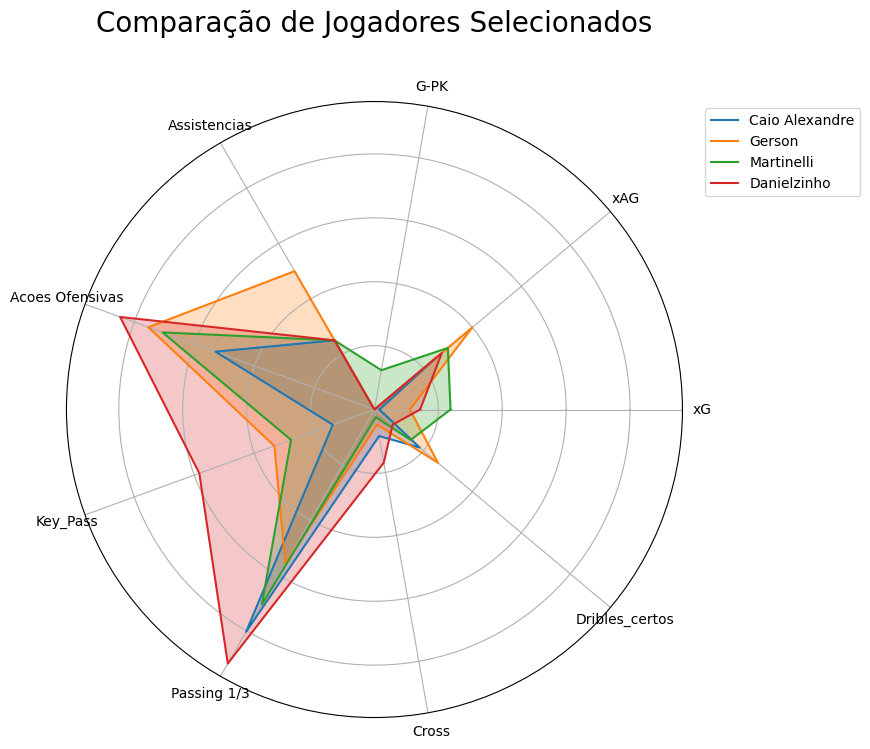

In [41]:
def radar_chart_por_jogadores(jogadores_selecionados, df):
    # Filtrar os jogadores pelos nomes inseridos
    jogadores_filtrados = df[df['jogador'].isin(jogadores_selecionados)]

    if jogadores_filtrados.empty:
        print(f"Nenhum jogador encontrado nos nomes fornecidos: {jogadores_selecionados}")
        return

    print(f"\nJogadores selecionados: {', '.join(jogadores_filtrados['jogador'])}")
    print(jogadores_filtrados[['xG','xAG','G-PK','Assistencias','Acoes Ofensivas','Key_Pass','Passing 1/3','Cross','Dribles_certos','Minutos']])

    # Definir as métricas a serem exibidas no radar
    metricas = ['xG','xAG','G-PK','Assistencias','Acoes Ofensivas','Key_Pass','Passing 1/3','Cross','Dribles_certos']
    num_vars = len(metricas)

    # Normalizar as métricas para todas ficarem na escala [0, 1]
    jogadores_normalizados = jogadores_filtrados.copy()
    for metrica in metricas:
        min_val = df[metrica].min()
        max_val = df[metrica].max()
        jogadores_normalizados[metrica] = (jogadores_filtrados[metrica] - min_val) / (max_val - min_val)

    # Ângulos para o gráfico radar
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Fechar o círculo

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    # Loop pelos jogadores selecionados
    for i, row in jogadores_normalizados.iterrows():
        valores = row[metricas].tolist()
        valores += valores[:1]  # Fechar o círculo

        # Plotar a linha e o preenchimento para o jogador
        ax.plot(angles, valores, label=row['jogador'])
        ax.fill(angles, valores, alpha=0.25)

    # Configurações do gráfico
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metricas)

    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
    plt.title('Comparação de Jogadores Selecionados', size=20, color='black', y=1.1)
    plt.show()

# Exemplo de uso: Insira os nomes dos jogadores que deseja comparar
jogadores_selecionados = ['Danielzinho', 'Martinelli','Caio Alexandre','Gerson' ]  # Altere conforme necessário
radar_chart_por_jogadores(jogadores_selecionados, meia_ofensivo)